In [1]:
# %load /Users/facai/Study/book_notes/preconfig.py
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import SVG

逻辑回归在TensorFlow contrib.learn中的实现简介
==============================

分析用的代码版本信息

```bash
~/W/g/t/tensorflow ❯❯❯ git log -n 1
commit 8308ecd1ec68d914365b8fdfa16d5ac97e69f18c
Merge: f991800 310901d
Author: Shanqing Cai <cais@google.com>
Date:   Sun Dec 25 08:44:49 2016 -0500

    Merge pull request #6465 from velaia/patch-1

    typo 'unit8' instead of 'uint8'
```

### 0. 总纲

在contrib.learn中确实有个[LogisticRegressor](https://www.tensorflow.org/api_docs/python/tf/contrib/learn/LogisticRegressor)，然而我理解它是一个低层的封装，需要写model_fn来指定损失函数。而真正可直接使用的是[LinearClassifier](https://www.tensorflow.org/api_docs/python/tf/contrib/learn/LinearClassifier)，默认是二分类逻辑回归，简单的构成图如下：

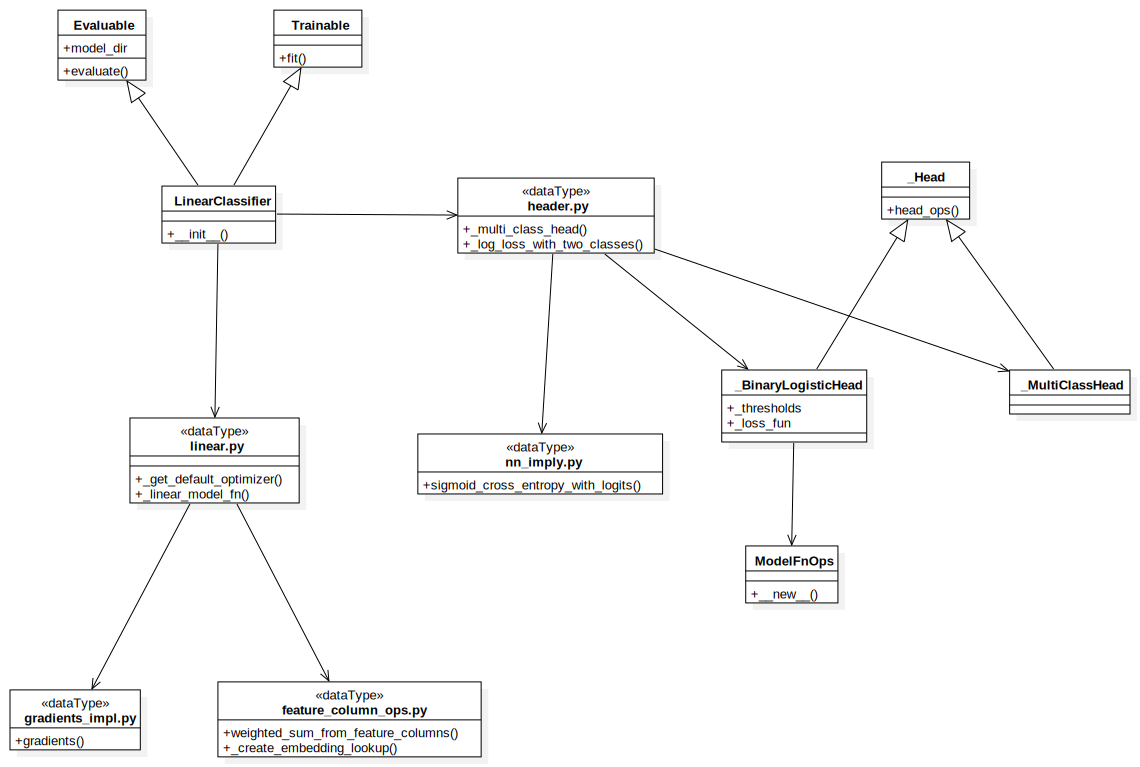

In [2]:
SVG("./res/tensorflow_lr.svg")

TensorFlow的封装非常细，需要跳来跳去，但逻辑性很好，可以很容易追出整个流程，所以就不打算再细贴代码了，只说对于二分类的几个重点：

0. LinearClassifier默认是二分类逻辑回归，见head_lib.multi_class_head方法。
1. 损失函数:
   + _linear_model_fn中计算的logits = $w^T x + b$。    
     有趣的是，这里用了embeding，似乎已经支持稀疏矩阵。我这方面不太熟，只是猜测。
   + 在_BinaryLogisticHead中调用sigmoid_cross_entropy_with_logits计算出损失函数。这里的公式是针对标签是0/1的推导，所以与spark和sklearn略有差异。
2. 导数：在_linear_model_fn中调用gradients.gradients来计算。

### 1. 小结

本文概要介绍了TensorFlow contrib.learn中逻辑回归的实现。